In [83]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl

In [84]:
front_dist = ctrl.Antecedent(np.arange(0, 256, 1), 'front_dist') 
right_dist = ctrl.Antecedent(np.arange(0, 256, 1), 'right_dist') 
left_dist = ctrl.Antecedent(np.arange(0, 256, 1), 'left_dist') 

right_motor = ctrl.Consequent(np.arange(-101, 101, 1), 'right_motor')
left_motor = ctrl.Consequent(np.arange(-101, 101, 1), 'left_motor')

In [85]:
front_dist['near']= fuzz.trapmf(front_dist.universe, [0,0,10,30])
front_dist['medium']= fuzz.trimf(front_dist.universe, [25, 50, 80])
front_dist['far']= fuzz.trapmf(front_dist.universe, [75,100,255,255])


right_dist['near']= fuzz.trapmf(right_dist.universe, [0,0,10,30])
right_dist['medium']= fuzz.trimf(right_dist.universe, [25, 50, 80])
right_dist['far']= fuzz.trapmf(right_dist.universe, [75,100,255,255])


left_dist['near']= fuzz.trapmf(left_dist.universe, [0,0,10,30])
left_dist['medium']= fuzz.trimf(left_dist.universe, [25, 50, 80])
left_dist['far']= fuzz.trapmf(left_dist.universe, [75,100,255,255])





/Users/obaydaba/miniconda3/envs/ai/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


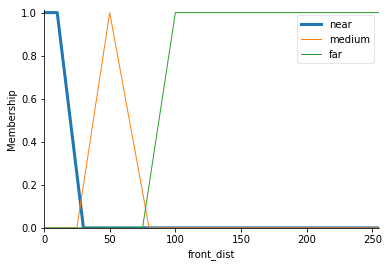

In [86]:
front_dist['near'].view()

In [87]:
right_motor['stop'] = fuzz.trapmf(right_motor.universe, [-10,-5, 5, 10])
right_motor['low'] = fuzz.trapmf(right_motor.universe, [5,20, 30, 60])
right_motor['high'] = fuzz.trapmf(right_motor.universe, [50,60, 100, 100])

right_motor['min_low'] = fuzz.trapmf(right_motor.universe, [-60,-30, -20, -5])
right_motor['min_high'] = fuzz.trapmf(right_motor.universe, [-100,-100, -60, -50])



left_motor['stop'] = fuzz.trapmf(left_motor.universe, [-10,-5, 5, 10])
left_motor['low'] = fuzz.trapmf(left_motor.universe, [5,20, 30, 60])
left_motor['high'] = fuzz.trapmf(left_motor.universe, [50,60, 100, 100])

left_motor['min_low'] = fuzz.trapmf(left_motor.universe, [-60,-30, -20, -5])
left_motor['min_high'] = fuzz.trapmf(left_motor.universe, [-100,-100, -60, -50])






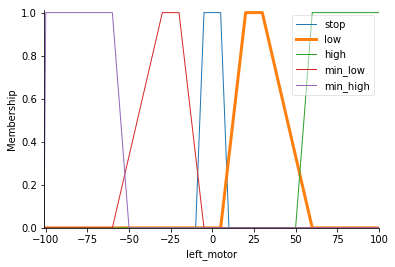

In [88]:
left_motor['low'].view()

In [122]:
# Implement the rules:
r00 = ctrl.Rule(front_dist['near'] | right_dist['near']| left_dist['near'] ,  left_motor['high']) 
r01 = ctrl.Rule(front_dist['near'] | right_dist['near']| left_dist['near'] , right_motor['min_high'] ) 

r10 = ctrl.Rule(front_dist['far']  ,  left_motor['high']) 
r11 = ctrl.Rule(front_dist['far']  ,  right_motor['high']) 

r20 = ctrl.Rule(front_dist['far'] | right_dist['medium'],  left_motor['low']) 
r21 = ctrl.Rule(front_dist['far'] | right_dist['medium'],  right_motor['high']) 

r30 = ctrl.Rule(front_dist['far'] | left_dist['medium'],  right_motor['low']) 
r31 = ctrl.Rule(front_dist['far'] | left_dist['medium'],  left_motor['high'])


r40 = ctrl.Rule(front_dist['near'] | right_dist['medium'],  left_motor['low']) 
r41 = ctrl.Rule(front_dist['near'] | right_dist['medium'],  right_motor['min_low']) 
r42 = ctrl.Rule(front_dist['near'] | right_dist['far'],  left_motor['low']) 
r43 = ctrl.Rule(front_dist['near'] | right_dist['far'],  right_motor['min_low']) 


r50 = ctrl.Rule(front_dist['near'] | left_dist['medium'],  right_motor['low']) 
r51 = ctrl.Rule(front_dist['near'] | left_dist['medium'],  left_motor['min_low']) 
r52 = ctrl.Rule(front_dist['near'] | left_dist['far'],  right_motor['low']) 
r53 = ctrl.Rule(front_dist['near'] | left_dist['far'],  left_motor['min_low'])


r60 = ctrl.Rule(front_dist['medium'] | right_dist['medium'],  left_motor['low']) 
r61 = ctrl.Rule(front_dist['medium'] | right_dist['medium'],  right_motor['low']) 

r70 = ctrl.Rule(front_dist['medium'] | left_dist['medium'],  right_motor['low']) 
r71 = ctrl.Rule(front_dist['medium'] | left_dist['medium'],  left_motor['low'])




In [126]:
RAO = ctrl.ControlSystem([
r00, r01, r10, r11, r10, r11, r20, r21, r30, r31, r40, r41 , r42, r43, r50, r51 , r52, r53, r60, r61, r70, r71
])

rao = ctrl.ControlSystemSimulation(RAO)
rao.input['front_dist'] = 25
rao.input['right_dist'] = 25
rao.input['left_dist'] = 150


# Crunch the numbers 
rao.compute()
print (rao.output)
# print (rao.output['left_motor']) 
# print (rao.output['right_motor']) 
# rao.view(sim=rao)


OrderedDict([('left_motor', 5.04551820728291), ('right_motor', -5.4181547619047645)])


In [116]:
rao = ctrl.ControlSystemSimulation(RAO)
rao.input['front_dist'] = 20
# rao.input['right_dist'] = 100
rao.input['left_dist'] = 10


# Crunch the numbers 
rao.compute()
print (rao.output)
# print (rao.output['left_motor']) 
# print (rao.output['right_motor']) 
# rao.view(sim=rao)

OrderedDict([('left_motor', 5.316091954022987), ('right_motor', -5.316091954022991)])
